<a href="https://colab.research.google.com/github/AlfonsoTGarcia-Sosa/ML/blob/master/balanced_GraphConv18May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-05-18 10:10:57--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   169MB/s    in 0.5s    

2020-05-18 10:10:58 (169 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - 

In [2]:
import tensorflow as tf
print("tf.__version__: %s" % str(tf.__version__))
device_name = tf.test.gpu_device_name()
if not device_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf.__version__: 2.2.0


SystemError: ignored

In [3]:
!git clone https://github.com/deepchem/deepchem.git

Cloning into 'deepchem'...
remote: Enumerating objects: 651, done.
remote: Counting objects: 100% (651/651), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 31210 (delta 427), reused 568 (delta 386), pack-reused 30559
Receiving objects: 100% (31210/31210), 438.04 MiB | 15.26 MiB/s, done.
Resolving deltas: 100% (22985/22985), done.


In [4]:
%cd deepchem/

/content/deepchem


In [5]:
!python setup.py install

     |████████████████████████████████| 110 kB 2.7 MB/s 
running install
[pbr] Writing ChangeLog
[pbr] Generating ChangeLog
[pbr] ChangeLog complete (0.1s)
[pbr] Generating AUTHORS
[pbr] AUTHORS complete (0.2s)
running build
running build_py
creating build
creating build/lib
creating build/lib/deepchem
creating build/lib/deepchem/dock
copying deepchem/dock/__init__.py -> build/lib/deepchem/dock
copying deepchem/dock/binding_pocket.py -> build/lib/deepchem/dock
copying deepchem/dock/pose_scoring.py -> build/lib/deepchem/dock
copying deepchem/dock/docking.py -> build/lib/deepchem/dock
copying deepchem/dock/pose_generation.py -> build/lib/deepchem/dock
creating build/lib/deepchem/models
copying deepchem/models/callbacks.py -> build/lib/deepchem/models
copying deepchem/models/optimizers.py -> build/lib/deepchem/models
copying deepchem/models/graph_models.py -> build/lib/deepchem/models
copying deepchem/models/fcnet.py -> build/lib/deepchem/models
copying deepchem/models/chemnet_layers.py -

In [0]:
import os
import sys
import deepchem as dc
from deepchem.utils.save import load_from_disk

In [0]:
import pandas as pd

In [8]:
print(pd)

<module 'pandas' from '/usr/local/lib/python3.6/dist-packages/pandas/__init__.py'>


In [0]:
from rdkit import Chem

In [0]:
from rdkit.Chem import Draw

In [0]:
from rdkit.Chem import PandasTools

In [0]:
from rdkit.Chem import Descriptors

In [0]:
from rdkit.Chem import rdmolops

In [14]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.DataFrame()

In [16]:
pd.__version__

'1.0.3'

In [0]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/train.csv",
                      current_dir)

In [0]:
df = pd.read_csv("train.csv")

In [0]:
df_rows, df_cols = df.shape

In [20]:
df

,s_sd_Canonical\_QSARr,s_m_title,HumDockScore,RatDockScore,ChimpDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,cas,casrn,cid,gsid,dsstox_substance_id,preferred_name,Canonical_QSARr,InChI_Code_QSARr,InChI Key_QSARr,BindingClass,avgD_Act,avgD_Inact,PredBindingClass,predMLogR
0,Nc1c(Cl)c([n]c(Cl)c1Cl)C(O)=O,1918-02-1,-5.844028,-7.582837,-6.858417,-6.761761,0,0.117561,0.180008,0,0.653088,1918-02-1,1918-02-1,1160,21160,DTXSID1021160,Picloram,Nc1c(Cl)c([n]c(Cl)c1Cl)C(O)=O,InChI=1S/C6H3Cl3N2O2/c7-1-3(10)2(8)5(9)11-4(1)...,NQQVFXUMIDALNH-UHFFFAOYSA-N,0,0.9257,0.9215,0.012162,0
1,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,50-27-1,-12.086825,-11.416709,-13.790830,-12.431455,1,0.008682,0.000102,1,84.806906,50-27-1,50-27-1,2366,22366,DTXSID9022366,Estriol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,InChI=1S/C18H24O3/c1-18-7-6-13-12-5-3-11(19)8-...,PROQIPRRNZUXQM-ZXXIGWHRSA-N,1,0.8676,0.9291,0.957575,1
2,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,500-38-9,-12.436467,-12.085485,-12.801535,-12.441162,1,0.027501,0.000616,1,44.672972,500-38-9,500-38-9,2437,22437,DTXSID5022437,Nordihydroguaiaretic acid,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,InChI=1S/C18H22O4/c1-11(7-13-3-5-15(19)17(21)9...,HCZKYJDFEPMADG-UHFFFAOYSA-N,1,0.8877,0.8946,0.244343,0
3,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,521-18-6,-10.234326,0.000000,-12.382423,-7.538916,1,0.041440,0.001224,1,33.866977,521-18-6,521-18-6,2364,22364,DTXSID9022364,5alpha-Dihydrotestosterone,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,InChI=1S/C19H30O2/c1-18-9-7-13(20)11-12(18)3-4...,NVKAWKQGWWIWPM-ABEVXSGRSA-N,1,0.8909,0.9404,0.840149,1
4,NaN,DB06710,0.000000,0.000000,-12.004982,-4.001661,1,0.057602,0.002189,1,26.319556,NaN,DB06710,NaN,NaN,NaN,NaN,CC12CCC3C(CCC4=CC(=O)CCC43C)C1CCC2(C)O,InChI=1S/C20H30O2/c1-18-9-6-14(21)12-13(18)4-5...,GCKMFJBGXUYNAG-UHFFFAOYSA-N,1,0.8585,0.9245,0.978790,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,NaN,NOCAS_48509,0.000000,0.000000,0.000000,0.000000,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48509,28483,48509,DTXSID0048509,PharmaGSID_48509,CCCN(C1CCN(CC1)C(=O)C1CCNCC1)[C@H]1Cc2cc(ccc2C...,InChI=1S/C25H39N3O2/c1-3-14-28(23-6-4-19-5-7-2...,KTAULCNFQYFKTN-HSZRJFAPSA-N,0,0.8805,0.8947,0.320631,0
1667,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,NOCAS_48514,-7.993627,0.000000,0.000000,-2.664542,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48514,28488,48514,DTXSID9048514,PharmaGSID_48514,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,InChI=1S/C17H16ClNO4S/c1-12-3-8-15(16(18)11-12...,WGDPLICUMTVYDB-MDZDMXLPSA-N,0,0.8877,0.8937,0.178343,0
1668,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,NOCAS_48516,-10.280437,0.000000,0.000000,-3.426812,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48516,28490,48516,DTXSID9048516,PharmaGSID_48516,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,InChI=1S/C15H11ClFNO3S/c16-14-10-12(17)6-7-13(...,AUMLVMKWJGCERZ-CMDGGOBGSA-N,0,0.8958,0.8995,0.125889,0
1669,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,NOCAS_48518,-9.405784,0.000000,0.000000,-3.135261,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48518,28492,48518,DTXSID9048518,PharmaGSID_48518,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,InChI=1S/C13H9BrFNO3S2/c14-12-8-9(15)3-4-11(12...,QXWJDGMLSMFETH-FNORWQNLSA-N,0,0.9155,0.9161,0.059053,0


In [0]:
PandasTools.AddMoleculeColumnToFrame(df, "Canonical_QSARr","Mol")

In [0]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/binders.csv",  current_dir)

In [0]:
active_df = pd.read_csv("binders.csv")

In [0]:
active_df_rows, active_df_cols = active_df.shape

In [25]:
active_df

,s_sd_Canonical\_QSARr,s_m_title,HumDockScore,RatDockScore,ChimpDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,cas,casrn,cid,gsid,dsstox_substance_id,preferred_name,SMILES,InChI_Code_QSARr,InChI Key_QSARr,BindingClass,avgD_Act,avgD_Inact,PredBindingClass,predMLogR
0,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,50-27-1,-12.086825,-11.416709,-13.790830,-12.431455,1,0.008682,0.000102,1,84.806906,50-27-1,50-27-1,2366,22366,DTXSID9022366,Estriol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,InChI=1S/C18H24O3/c1-18-7-6-13-12-5-3-11(19)8-...,PROQIPRRNZUXQM-ZXXIGWHRSA-N,1,0.8676,0.9291,0.957575,1
1,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,500-38-9,-12.436467,-12.085485,-12.801535,-12.441162,1,0.027501,0.000616,1,44.672972,500-38-9,500-38-9,2437,22437,DTXSID5022437,Nordihydroguaiaretic acid,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,InChI=1S/C18H22O4/c1-11(7-13-3-5-15(19)17(21)9...,HCZKYJDFEPMADG-UHFFFAOYSA-N,1,0.8877,0.8946,0.244343,0
2,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,521-18-6,-10.234326,0.000000,-12.382423,-7.538916,1,0.041440,0.001224,1,33.866977,521-18-6,521-18-6,2364,22364,DTXSID9022364,5alpha-Dihydrotestosterone,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,InChI=1S/C19H30O2/c1-18-9-7-13(20)11-12(18)3-4...,NVKAWKQGWWIWPM-ABEVXSGRSA-N,1,0.8909,0.9404,0.840149,1
3,NaN,DB06710,0.000000,0.000000,-12.004982,-4.001661,1,0.057602,0.002189,1,26.319556,NaN,DB06710,NaN,NaN,NaN,NaN,CC12CCC3C(CCC4=CC(=O)CCC43C)C1CCC2(C)O,InChI=1S/C20H30O2/c1-18-9-6-14(21)12-13(18)4-5...,GCKMFJBGXUYNAG-UHFFFAOYSA-N,1,0.8585,0.9245,0.978790,1
4,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,50-28-2,-10.560744,-10.890292,-11.979087,-11.143374,1,0.058836,0.002275,1,25.865744,50-28-2,50-28-2,573,20573,DTXSID0020573,17beta-Estradiol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...,VOXZDWNPVJITMN-ZBRFXRBCSA-N,1,0.8610,0.9286,0.979430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NOCAS_47353,0.000000,0.000000,0.000000,0.000000,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47353,27353,47353,DTXSID2047353,SSR241586,CN(C)C(=O)C1(CCN(CCC2(CN(CCO2)C(=O)c2ccccc2)c2...,InChI=1S/C32H42Cl2N4O3/c1-35(2)30(40)31(38-16-...,RVQZVVJLIUXDPN-UHFFFAOYSA-N,1,0.8886,0.9127,0.414780,0
201,CC(C)N1CCC(CC1)NC(=O)c1cc2cc(ccc2[n]1Cc1cc(o[n...,NOCAS_47377,-1.233447,0.000000,0.000000,-0.411149,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47377,27377,47377,DTXSID0047377,AVE6324,CC(C)N1CCC(CC1)NC(=O)c1cc2cc(ccc2[n]1Cc1cc(o[n...,InChI=1S/C31H35ClN4O7S/c1-5-40-31(39)42-19(4)4...,GJTKAAFWJZWEPS-LJQANCHMSA-N,1,0.8925,0.9121,0.316721,0
202,NaN,NOCAS_47379,0.000000,0.000000,0.000000,0.000000,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47379,27379,47379,DTXSID0047379,SSR126768,CCN(Cc1c[n]ccc1)C(=O)c1cccc(Cl)c1[C@]1(C)C(=O)...,InChI=1S/C33H31Cl2N3O4/c1-5-37(19-21-8-7-15-36...,UNYCSANQWMNNCS-MGBGTMOVSA-N,1,0.8832,0.9106,0.511874,1
203,NaN,NOCAS_47389,0.000000,0.000000,0.000000,0.000000,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47389,27389,47389,DTXSID4047389,SAR150640,CCOC(=O)c1ccc(cc1)[C@@H]1CC[C@H](CC1)NC[C@H](O...,InChI=1S/C25H34N2O7S/c1-3-33-25(30)19-6-4-17(5...,WCPJDRQPTLGHOD-JBACZVJFSA-N,1,0.8821,0.8975,0.327143,0


In [0]:
PandasTools.AddMoleculeColumnToFrame(active_df,"SMILES","Mol")

In [0]:
#df.columns = ["SMILES","s_m_title","bindingClass","Mol"]

In [27]:
print([str(x) for x in active_df.columns])

['s_sd_Canonical\\_QSARr', 's_m_title', 'HumDockScore', 'RatDockScore', 'ChimpDockScore', 'AVG', 'bindingClass', 'P_Act_dockChimp', 'P_Inact', 'PredBayes', 'ratio', 'cas', 'casrn', 'cid', 'gsid', 'dsstox_substance_id', 'preferred_name', 'SMILES', 'InChI_Code_QSARr', 'InChI Key_QSARr', 'BindingClass', 'avgD_Act', 'avgD_Inact', 'PredBindingClass', 'predMLogR', 'Mol']


In [0]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/nonbinders.csv",  current_dir)

In [0]:
inactive_df = pd.read_csv("nonbinders.csv")

In [0]:
tmp_df = active_df.append(inactive_df)

In [0]:
active_df["label"] = ["Binders"]*active_df_rows

In [0]:
PandasTools.AddMoleculeColumnToFrame(inactive_df,"SMILES","Mol")

In [0]:
inactive_df_rows, inactive_df_cols = inactive_df.shape

In [0]:
inactive_df["label"] = ["Nonbinders"]*inactive_df_rows

In [0]:
tmp_df = active_df.append(inactive_df)

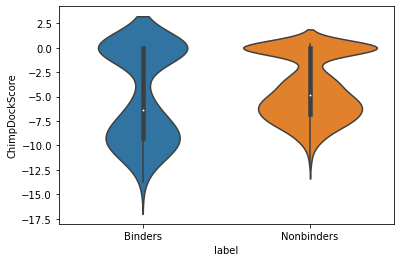

In [0]:
fig = sns.violinplot(tmp_df["label"], tmp_df["ChimpDockScore"])

In [0]:
fig_chimpdockscore = fig.get_figure()

In [0]:
fig_chimpdockscore.savefig('fig_chimpdockscore.png',dpi=600)

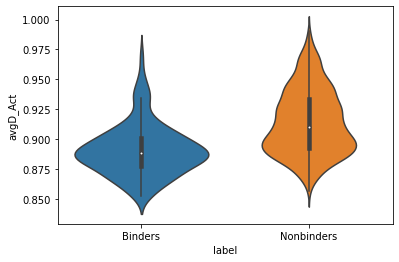

In [0]:
fig2 = sns.violinplot(tmp_df["label"], tmp_df["avgD_Act"])

In [0]:
fig_avgD_Act = fig2.get_figure()

In [0]:
fig_avgD_Act.savefig('fig_avgD_Act.png',dpi=600)

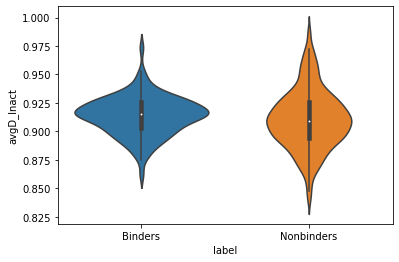

In [0]:
fig3 = sns.violinplot(tmp_df["label"], tmp_df["avgD_Inact"])

In [0]:
fig_avgD_Inact = fig3.get_figure()

In [0]:
fig_avgD_Inact.savefig('fig_avgD_Inact.png',dpi=600)

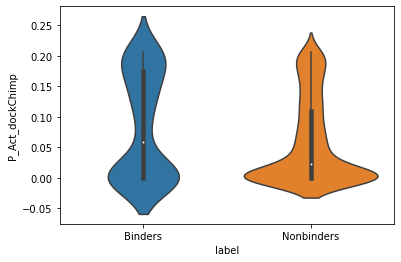

In [0]:
fig4 = sns.violinplot(tmp_df["label"], tmp_df["P_Act_dockChimp"])

In [0]:
fig_P_Act_dockChimp = fig4.get_figure()

In [0]:
fig_P_Act_dockChimp.savefig('fig_P_Act_dockChimp.png',dpi=600)

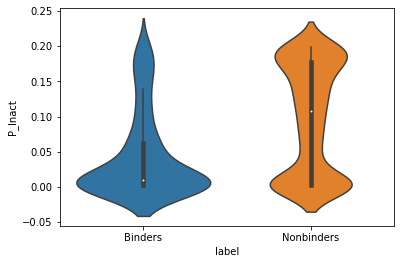

In [0]:
fig5 = sns.violinplot(tmp_df["label"], tmp_df["P_Inact"])

In [0]:
fig_P_Inact = fig5.get_figure()

In [0]:
fig_P_Inact.savefig('fig_P_Inact.png',dpi=600)

In [0]:
bal_df = tmp_df

In [0]:
g = bal_df.groupby('bindingClass')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

s_sd_Canonical\_QSARr  ...    label
bindingClass                                                         ...         
0            0                               CN(C)C(=S)SSC(=S)N(C)C  ...      NaN
             1                                                  NaN  ...      NaN
             2                                      CCCCC(CC)C(O)=O  ...      NaN
             3                                                  NaN  ...      NaN
             4                        CC(=O)NCCc1c[nH]c2ccc(cc12)OC  ...      NaN
...                                                             ...  ...      ...
1            200  C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@@]2(C)[...  ...  Binders
             201                                                NaN  ...  Binders
             202              O=C1C2CC=CCC2C(=O)N1SC(Cl)(Cl)C(Cl)Cl  ...  Binders
             203                         CC(=Cc1ccccc1)[N+]([O-])=O  ...  Binders
             204                                                NaN  ...  Binders

[410 rows x 27 columns]
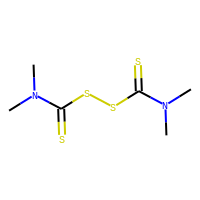
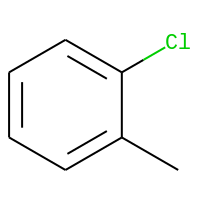
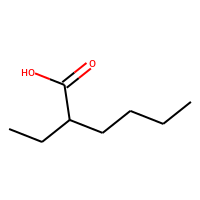
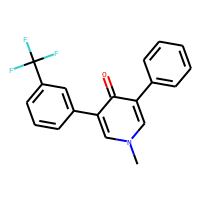
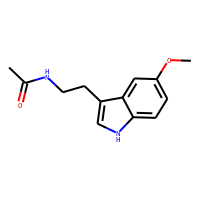
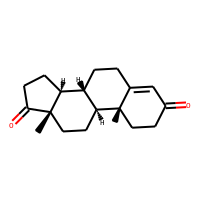
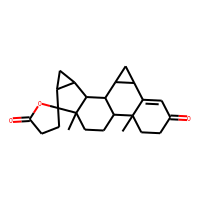
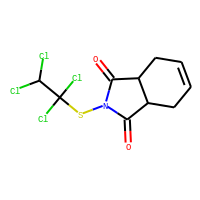
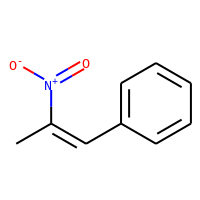
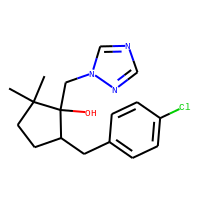

In [39]:
g

s_sd_Canonical\_QSARr  ... label
bindingClass                                   ...      
0            0         CN(C)C(=S)SSC(=S)N(C)C  ...   NaN
             1                            NaN  ...   NaN
             2                CCCCC(CC)C(O)=O  ...   NaN
             3                            NaN  ...   NaN
             4  CC(=O)NCCc1c[nH]c2ccc(cc12)OC  ...   NaN

[5 rows x 27 columns]
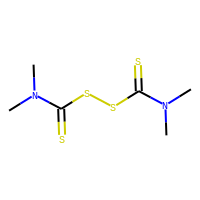
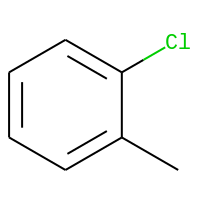
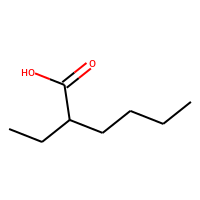
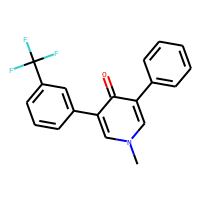
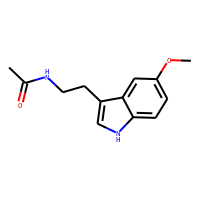

In [40]:
g.head()

In [0]:
g.shape

(410, 27)

In [0]:
user_specified_features = ['HumDockScore','RatDockScore','ChimpDockScore','AVG','P_Act_dockChimp','P_Inact','PredBayes','ratio','avgD_Act','avgD_Inact','PredBindingClass','predMLogR']

In [0]:
from itertools import islice
from IPython.display import Image, display, HTML

In [0]:
import tempfile, shutil

In [0]:
featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)

In [0]:
#featurizer = dc.feat.base_classes.UserDefinedFeaturizer(user_specified_features)

In [0]:
#loader = dc.data.data_loader.CSVLoader(
loader = dc.data.UserCSVLoader(
      #tasks=["bindingClass"], smiles_field=['SMILES'], id_field=["casrn"],
      tasks=["bindingClass"], id_field="casrn",
      featurizer=featurizer)

In [0]:
g.to_csv('balanced.csv',index=False)

In [47]:
g.columns

Index(['s_sd_Canonical\_QSARr', 's_m_title', 'HumDockScore', 'RatDockScore',
       'ChimpDockScore', 'AVG', 'bindingClass', 'P_Act_dockChimp', 'P_Inact',
       'PredBayes', 'ratio', 'cas', 'casrn', 'cid', 'gsid',
       'dsstox_substance_id', 'preferred_name', 'SMILES', 'InChI_Code_QSARr',
       'InChI Key_QSARr', 'BindingClass', 'avgD_Act', 'avgD_Inact',
       'PredBindingClass', 'predMLogR', 'Mol', 'label'],
      dtype='object')

HumDockScore  ...    label
bindingClass                    ...         
0            0       -5.935165  ...      NaN
             1        0.000000  ...      NaN
             2       -6.068335  ...      NaN
             3        0.000000  ...      NaN
             4       -8.058715  ...      NaN
...                        ...  ...      ...
1            200     -9.417615  ...  Binders
             201      0.000000  ...  Binders
             202     -7.737314  ...  Binders
             203     -6.397957  ...  Binders
             204      0.000000  ...  Binders

[410 rows x 17 columns]
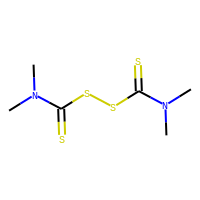
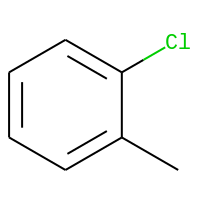
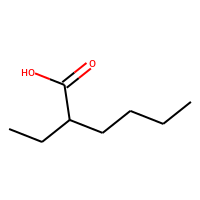
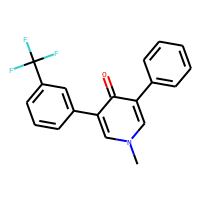
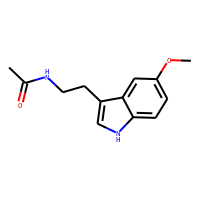
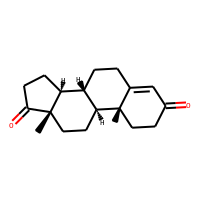
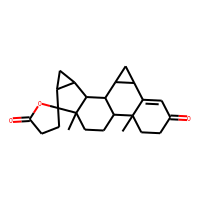
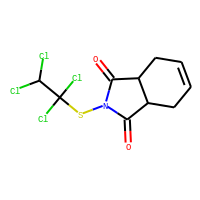
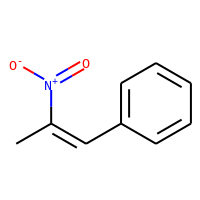
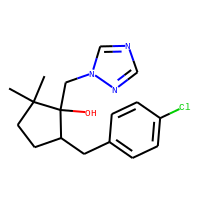

In [48]:
g.drop(columns=['s_sd_Canonical\_QSARr','s_m_title','cas','cid', 'gsid',
       'dsstox_substance_id', 'preferred_name','InChI_Code_QSARr',
       'InChI Key_QSARr', 'BindingClass'])

In [0]:
g.to_csv('balanced_droppedcols.csv',index=False)

In [0]:
#dataset_file = "test.csv"

In [0]:
#dataset = pd.read_csv("balanced_droppedcols.csv")

In [0]:
#user_specified_features = ['MW','AlogP','HBA','HBD','RB','HeavyAtomCount','ChiralCenterCount','ChiralCenterCountAllPossible','RingCount','PSA','Estate','MR','Polar','sLi_Key','ssBe_Key','ssssBem_Key','sBH2_Key','ssBH_Key','sssB_Key','ssssBm_Key','sCH3_Key','dCH2_Key','ssCH2_Key','tCH_Key','dsCH_Key','aaCH_Key','sssCH_Key','ddC_Key','tsC_Key','dssC_Key','aasC_Key','aaaC_Key','ssssC_Key','sNH3_Key','sNH2_Key','ssNH2_Key','dNH_Key','ssNH_Key','aaNH_Key','tN_Key','sssNH_Key','dsN_Key','aaN_Key','sssN_Key','ddsN_Key','aasN_Key','ssssN_Key','daaN_Key','sOH_Key','dO_Key','ssO_Key','aaO_Key','aOm_Key','sOm_Key','sF_Key','sSiH3_Key','ssSiH2_Key','sssSiH_Key','ssssSi_Key','sPH2_Key','ssPH_Key','sssP_Key','dsssP_Key','ddsP_Key','sssssP_Key','sSH_Key','dS_Key','ssS_Key','aaS_Key','dssS_Key','ddssS_Key','ssssssS_Key','Sm_Key','sCl_Key','sGeH3_Key','ssGeH2_Key','sssGeH_Key','ssssGe_Key','sAsH2_Key','ssAsH_Key','sssAs_Key','dsssAs_Key','ddsAs_Key','sssssAs_Key','sSeH_Key','dSe_Key','ssSe_Key','aaSe_Key','dssSe_Key','ssssssSe_Key','ddssSe_Key','sBr_Key','sSnH3_Key','ssSnH2_Key','sssSnH_Key','ssssSn_Key','sI_Key','sPbH3_Key','ssPbH2_Key','sssPbH_Key','ssssPb_Key','sLi_Cnt','ssBe_Cnt','ssssBem_Cnt','sBH2_Cnt','ssBH_Cnt','sssB_Cnt','ssssBm_Cnt','sCH3_Cnt','dCH2_Cnt','ssCH2_Cnt','tCH_Cnt','dsCH_Cnt','aaCH_Cnt','sssCH_Cnt','ddC_Cnt','tsC_Cnt','dssC_Cnt','aasC_Cnt','aaaC_Cnt','ssssC_Cnt','sNH3_Cnt','sNH2_Cnt','ssNH2_Cnt','dNH_Cnt','ssNH_Cnt','aaNH_Cnt','tN_Cnt','sssNH_Cnt','dsN_Cnt','aaN_Cnt','sssN_Cnt','ddsN_Cnt','aasN_Cnt','ssssN_Cnt','daaN_Cnt','sOH_Cnt','dO_Cnt','ssO_Cnt','aaO_Cnt','aOm_Cnt','sOm_Cnt','sF_Cnt','sSiH3_Cnt','ssSiH2_Cnt','sssSiH_Cnt','ssssSi_Cnt','sPH2_Cnt','ssPH_Cnt','sssP_Cnt','dsssP_Cnt','ddsP_Cnt','sssssP_Cnt','sSH_Cnt','dS_Cnt','ssS_Cnt','aaS_Cnt','dssS_Cnt','ddssS_Cnt','ssssssS_Cnt','Sm_Cnt','sCl_Cnt','sGeH3_Cnt','ssGeH2_Cnt','sssGeH_Cnt','ssssGe_Cnt','sAsH2_Cnt','ssAsH_Cnt','sssAs_Cnt','dsssAs_Cnt','ddsAs_Cnt','sssssAs_Cnt','sSeH_Cnt','dSe_Cnt','ssSe_Cnt','aaSe_Cnt','dssSe_Cnt','ssssssSe_Cnt','ddssSe_Cnt','sBr_Cnt','sSnH3_Cnt','ssSnH2_Cnt','sssSnH_Cnt','ssssSn_Cnt','sI_Cnt','sPbH3_Cnt','ssPbH2_Cnt','sssPbH_Cnt','ssssPb_Cnt','sLi_Sum','ssBe_Sum','ssssBem_Sum','sBH2_Sum','ssBH_Sum','sssB_Sum','ssssBm_Sum','sCH3_Sum','dCH2_Sum','ssCH2_Sum','tCH_Sum','dsCH_Sum','aaCH_Sum','sssCH_Sum','ddC_Sum','tsC_Sum','dssC_Sum','aasC_Sum','aaaC_Sum','ssssC_Sum','sNH3_Sum','sNH2_Sum','ssNH2_Sum','dNH_Sum','ssNH_Sum','aaNH_Sum','tN_Sum','sssNH_Sum','dsN_Sum','aaN_Sum','sssN_Sum','ddsN_Sum','aasN_Sum','ssssN_Sum','daaN_Sum','sOH_Sum','dO_Sum','ssO_Sum','aaO_Sum','aOm_Sum','sOm_Sum','sF_Sum','sSiH3_Sum','ssSiH2_Sum','sssSiH_Sum','ssssSi_Sum','sPH2_Sum','ssPH_Sum','sssP_Sum','dsssP_Sum','ddsP_Sum','sssssP_Sum','sSH_Sum','dS_Sum','ssS_Sum','aaS_Sum','dssS_Sum','ddssS_Sum','ssssssS_Sum','Sm_Sum','sCl_Sum','sGeH3_Sum','ssGeH2_Sum','sssGeH_Sum','ssssGe_Sum','sAsH2_Sum','ssAsH_Sum','sssAs_Sum','dsssAs_Sum','ddsAs_Sum','sssssAs_Sum','sSeH_Sum','dSe_Sum','ssSe_Sum','aaSe_Sum','dssSe_Sum','ssssssSe_Sum','ddssSe_Sum','sBr_Sum','sSnH3_Sum','ssSnH2_Sum','sssSnH_Sum','ssssSn_Sum','sI_Sum','sPbH3_Sum','ssPbH2_Sum','sssPbH_Sum','ssssPb_Sum','sLi_Avg','ssBe_Avg','ssssBem_Avg','sBH2_Avg','ssBH_Avg','sssB_Avg','ssssBm_Avg','sCH3_Avg','dCH2_Avg','ssCH2_Avg','tCH_Avg','dsCH_Avg','aaCH_Avg','sssCH_Avg','ddC_Avg','tsC_Avg','dssC_Avg','aasC_Avg','aaaC_Avg','ssssC_Avg','sNH3_Avg','sNH2_Avg','ssNH2_Avg','dNH_Avg','ssNH_Avg','aaNH_Avg','tN_Avg','sssNH_Avg','dsN_Avg','aaN_Avg','sssN_Avg','ddsN_Avg','aasN_Avg','ssssN_Avg','daaN_Avg','sOH_Avg','dO_Avg','ssO_Avg','aaO_Avg','aOm_Avg','sOm_Avg','sF_Avg','sSiH3_Avg','ssSiH2_Avg','sssSiH_Avg','ssssSi_Avg','sPH2_Avg','ssPH_Avg','sssP_Avg','dsssP_Avg','ddsP_Avg','sssssP_Avg','sSH_Avg','dS_Avg','ssS_Avg','aaS_Avg','dssS_Avg','ddssS_Avg','ssssssS_Avg','Sm_Avg','sCl_Avg','sGeH3_Avg','ssGeH2_Avg','sssGeH_Avg','ssssGe_Avg','sAsH2_Avg','ssAsH_Avg','sssAs_Avg','dsssAs_Avg','ddsAs_Avg','sssssAs_Avg','sSeH_Avg','dSe_Avg','ssSe_Avg','aaSe_Avg','dssSe_Avg','ssssssSe_Avg','ddssSe_Avg','sBr_Avg','sSnH3_Avg','ssSnH2_Avg','sssSnH_Avg','ssssSn_Avg','sI_Avg','sPbH3_Avg','ssPbH2_Avg','sssPbH_Avg','ssssPb_Avg','First Zagreb (ZM1)','First Zagreb index by valence vertex degrees (ZM1V)','Second Zagreb (ZM2)','Second Zagreb index by valence vertex degrees (ZM2V)','Polarity (Pol)','Narumi Simple Topological (NST)','Narumi Harmonic Topological (NHT)','Narumi Geometric Topological (NGT)','Total structure connectivity (TSC)','Wiener (W)','Mean Wiener (MW)','Xu (Xu)','Quadratic (QIndex)','Radial centric (RC)','Mean Square Distance Balaban (MSDB)','Superpendentic (SP)','Harary (Har)','Log of product of row sums (LPRS)','Pogliani (Pog)','Schultz Molecular Topological (SMT)','Schultz Molecular Topological by valence vertex degrees (SMTV)','Mean Distance Degree Deviation (MDDD)','Ramification (Ram)','Gutman Molecular Topological (GMT)','Gutman MTI by valence vertex degrees (GMTV)','Average vertex distance degree (AVDD)','Unipolarity (UP)','Centralization (CENT)','Variation (VAR)','Molecular electrotopological variation (MEV)','Maximal electrotopological positive variation (MEPV)','Maximal electrotopological negative variation (MENV)','Eccentric connectivity (ECCc)','Eccentricity (ECC)','Average eccentricity (AECC)','Eccentric (DECC)','Valence connectivity index chi-0 (vX0)','Valence connectivity index chi-1 (vX1)','Valence connectivity index chi-2 (vX2)','Valence connectivity index chi-3 (vX3)','Valence connectivity index chi-4 (vX4)','Valence connectivity index chi-5 (vX5)','Average valence connectivity index chi-0 (AvX0)','Average valence connectivity index chi-1 (AvX1)','Average valence connectivity index chi-2 (AvX2)','Average valence connectivity index chi-3 (AvX3)','Average valence connectivity index chi-4 (AvX4)','Average valence connectivity index chi-5 (AvX5)','Quasi Wiener (QW)','First Mohar (FM)','Second Mohar (SM)','Spanning tree number (STN)','Kier benzene-likeliness index (KBLI)','Topological charge index of order 1 (TCI1)','Topological charge index of order 2 (TCI2)','Topological charge index of order 3 (TCI3)','Topological charge index of order 4 (TCI4)','Topological charge index of order 5 (TCI5)','Topological charge index of order 6 (TCI6)','Topological charge index of order 7 (TCI7)','Topological charge index of order 8 (TCI8)','Topological charge index of order 9 (TCI9)','Topological charge index of order 10 (TCI10)','Mean topological charge index of order 1 (MTCI1)','Mean topological charge index of order 2 (MTCI2)','Mean topological charge index of order 3 (MTCI3)','Mean topological charge index of order 4 (MTCI4)','Mean topological charge index of order 5 (MTCI5)','Mean topological charge index of order 6 (MTCI6)','Mean topological charge index of order 7 (MTCI7)','Mean topological charge index of order 8 (MTCI8)','Mean topological charge index of order 9 (MTCI9)','Mean topological charge index of order 10 (MTCI10)','Global topological charge (GTC)','Hyper-distance-path index (HDPI)','Reciprocal hyper-distance-path index (RHDPI)','Square reciprocal distance sum (SRDS)','Modified Randic connectivity (MRC)','Balaban centric (BC)','Lopping centric (LC)','Kier Hall electronegativity (KHE)','Sum of topological distances between N..N (STD(N N))','Sum of topological distances between N..O (STD(N O))','Sum of topological distances between N..S (STD(N S))','Sum of topological distances between N..P (STD(N P))','Sum of topological distances between N..F (STD(N F))','Sum of topological distances between N..Cl (STD(N Cl))','Sum of topological distances between N..Br (STD(N Br))','Sum of topological distances between N..I (STD(N I))','Sum of topological distances between O..O (STD(O O))','Sum of topological distances between O..S (STD(O S))','Sum of topological distances between O..P (STD(O P))','Sum of topological distances between O..F (STD(O F))','Sum of topological distances between O..Cl (STD(O Cl))','Sum of topological distances between O..Br (STD(O Br))','Sum of topological distances between O..I (STD(O I))','Sum of topological distances between S..S (STD(S S))','Sum of topological distances between S..P (STD(S P))','Sum of topological distances between S..F (STD(S F))','Sum of topological distances between S..Cl (STD(S Cl))','Sum of topological distances between S..Br (STD(S Br))','Sum of topological distances between S..I (STD(S I))','Sum of topological distances between P..P (STD(P P))','Sum of topological distances between P..F (STD(P F))','Sum of topological distances between P..Cl (STD(P Cl))','Sum of topological distances between P..Br (STD(P Br))','Sum of topological distances between P..I (STD(P I))','Sum of topological distances between F..F (STD(F F))','Sum of topological distances between F..Cl (STD(F Cl))','Sum of topological distances between F..Br (STD(F Br))','Sum of topological distances between F..I (STD(F I))','Sum of topological distances between Cl..Cl (STD(Cl Cl))','Sum of topological distances between Cl..Br (STD(Cl Br))','Sum of topological distances between Cl..I (STD(Cl I))','Sum of topological distances between Br..Br (STD(Br Br))','Sum of topological distances between Br..I (STD(Br I))','Sum of topological distances between I..I (STD(I I))','Wiener-type index from Z weighted distance matrix - Barysz matrix (WhetZ)','Wiener-type index from electronegativity weighted distance matrix (Whete)','Wiener-type index from mass weighted distance matrix (Whetm)','Wiener-type index from van der waals weighted distance matrix (Whetv)','Wiener-type index from polarizability weighted distance matrix (Whetp)','Balaban-type index from Z weighted distance matrix - Barysz matrix (JhetZ)','Balaban-type index from electronegativity weighted distance matrix (Jhete)','Balaban-type index from mass weighted distance matrix (Jhetm)','Balaban-type index from van der waals weighted distance matrix (Jhetv)','Balaban-type index from polarizability weighted distance matrix (Jhetp)','Topological diameter (TD)','Topological radius (TR)','Petitjean 2D shape (PJ2DS)','Balaban distance connectivity index (J)','Solvation connectivity index chi-0 (SCIX0)','Solvation connectivity index chi-1 (SCIX1)','Solvation connectivity index chi-2 (SCIX2)','Solvation connectivity index chi-3 (SCIX3)','Solvation connectivity index chi-4 (SCIX4)','Solvation connectivity index chi-5 (SCIX5)','Connectivity index chi-0 (CIX0)','Connectivity chi-1 [Randic connectivity] (CIX1)','Connectivity index chi-2 (CIX2)','Connectivity index chi-3 (CIX3)','Connectivity index chi-4 (CIX4)','Connectivity index chi-5 (CIX5)','Average connectivity index chi-0 (ACIX0)','Average connectivity index chi-1 (ACIX1)','Average connectivity index chi-2 (ACIX2)','Average connectivity index chi-3 (ACIX3)','Average connectivity index chi-4 (ACIX4)','Average connectivity index chi-5 (ACIX5)','reciprocal distance Randic-type index (RDR)','reciprocal distance square Randic-type index (RDSR)','1-path Kier alpha-modified shape index (KAMS1)','2-path Kier alpha-modified shape index (KAMS2)','3-path Kier alpha-modified shape index (KAMS3)','Kier flexibility (KF)','path/walk 2 - Randic shape index (RSIpw2)','path/walk 3 - Randic shape index (RSIpw3)','path/walk 4 - Randic shape index (RSIpw4)','path/walk 5 - Randic shape index (RSIpw5)','E-state topological parameter (ETP)','Ring Count 3 (RNGCNT3)','Ring Count 4 (RNGCNT4)','Ring Count 5 (RNGCNT5)','Ring Count 6 (RNGCNT6)','Ring Count 7 (RNGCNT7)','Ring Count 8 (RNGCNT8)','Ring Count 9 (RNGCNT9)','Ring Count 10 (RNGCNT10)','Ring Count 11 (RNGCNT11)','Ring Count 12 (RNGCNT12)','Ring Count 13 (RNGCNT13)','Ring Count 14 (RNGCNT14)','Ring Count 15 (RNGCNT15)','Ring Count 16 (RNGCNT16)','Ring Count 17 (RNGCNT17)','Ring Count 18 (RNGCNT18)','Ring Count 19 (RNGCNT19)','Ring Count 20 (RNGCNT20)','Atom Count (ATMCNT)','Bond Count (BNDCNT)','Atoms in Ring System (ATMRNGCNT)','Bonds in Ring System (BNDRNGCNT)','Cyclomatic number (CYCLONUM)','Number of ring systems (NRS)','Normalized number of ring systems (NNRS)','Ring Fusion degree (RFD)','Ring perimeter (RNGPERM)','Ring bridge count (RNGBDGE)','Molecule cyclized degree (MCD)','Ring Fusion density (RFDELTA)','Ring complexity index (RCI)','Van der Waals surface area (VSA)','MR1 (MR1)','MR2 (MR2)','MR3 (MR3)','MR4 (MR4)','MR5 (MR5)','MR6 (MR6)','MR7 (MR7)','MR8 (MR8)','ALOGP1 (ALOGP1)','ALOGP2 (ALOGP2)','ALOGP3 (ALOGP3)','ALOGP4 (ALOGP4)','ALOGP5 (ALOGP5)','ALOGP6 (ALOGP6)','ALOGP7 (ALOGP7)','ALOGP8 (ALOGP8)','ALOGP9 (ALOGP9)','ALOGP10 (ALOGP10)','PEOE1 (PEOE1)','PEOE2 (PEOE2)','PEOE3 (PEOE3)','PEOE4 (PEOE4)','PEOE5 (PEOE5)','PEOE6 (PEOE6)','PEOE7 (PEOE7)','PEOE8 (PEOE8)','PEOE9 (PEOE9)','PEOE10 (PEOE10)','PEOE11 (PEOE11)','PEOE12 (PEOE12)','PEOE13 (PEOE13)','PEOE14 (PEOE14)']

In [0]:
#current_dir = os.path.dirname(os.path.realpath("__file__"))
#dc.utils.download_url("https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/desc_canvas_aug30.csv",
#                      current_dir)
#dataset_file = "desc_canvas_aug30.csv"

In [0]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/balanced_droppedcols1.csv",  current_dir)

In [0]:
dataset_file = "balanced_droppedcols1.csv"

In [52]:
dataset = loader.featurize(dataset_file)

About to start loading CSV from balanced_droppedcols1.csv
Loading shard 1 of size 8192.


/content/deepchem/deepchem/data/data_loader.py:269: FutureWarning: featurize() is deprecated and has been renamed to create_dataset(). featurize() will be removed in DeepChem 3.0
  FutureWarning)


In [0]:
#dataset = loader.featurize(f)

In [0]:
dataset

<DiskDataset X.shape: (410, 12), y.shape: (410, 1), w.shape: (410, 1), ids: ['87546-18-7' '125-84-8' '695-06-7' ... '145-73-3' '52806-53-8'
 '114369-43-6'], task_names: ['bindingClass']>

In [0]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/Eval_4.csv",  current_dir)

In [0]:
eval_df = pd.read_csv("Eval_4.csv")

In [55]:
eval_df

,casrn,ChimpDockScore,HumDockScore,RatDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,BindingClass,cid,cas,id,avgD_Act,avgD_Inact,PredBindingClass,predMLogR
0,100-06-1,-5.799919,0.0,0.0,-5.799919,0,0.056889,0.197769,0,0.287655,0,7476,100-06-1,2905,0.8815,0.8771,0,0.032257
1,100-10-7,-6.024903,0.0,0.0,-6.024903,0,0.068054,0.198405,0,0.343006,0,7479,100-10-7,2910,0.9047,0.9107,0,0.032288
2,100-11-8,-5.444213,0.0,0.0,-5.444213,0,0.041694,0.191803,0,0.217380,0,66011,100-11-8,2736,0.8991,0.9070,0,0.041337
3,100-14-1,-5.627005,0.0,0.0,-5.627005,0,0.049119,0.195610,0,0.251107,0,7482,100-14-1,2229,0.8901,0.9020,0,0.069511
4,100-18-5,-7.552393,0.0,0.0,-7.552393,0,0.160978,0.145590,1,1.105699,0,7486,100-18-5,2515,0.9059,0.9094,0,0.057763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,99614-02-5,-9.092566,0.0,0.0,-9.092566,0,0.204732,0.059381,1,3.447757,0,4595,99614-02-5,1760,0.8920,0.9082,0,0.359556
3878,99617-34-2,-6.485924,0.0,0.0,-6.485924,0,0.094205,0.192047,0,0.490531,0,9928181,99617-34-2,908,0.8947,0.9056,0,0.069175
3879,99665-00-6,-1.354963,0.0,0.0,-1.354963,0,0.000105,0.014222,0,0.007360,0,20056549,99665-00-6,1881,0.9088,0.9147,0,0.092869
3880,998-40-3,-4.579625,0.0,0.0,-4.579625,0,0.017028,0.156247,0,0.108983,0,13831,998-40-3,3189,0.9433,0.9301,0,0.003165


In [0]:
bal_eval = eval_df

In [0]:
eval_dataset_file = "Eval_4.csv"

In [58]:
eval_dataset = loader.featurize(eval_dataset_file)

About to start loading CSV from Eval_4.csv
Loading shard 1 of size 8192.


/content/deepchem/deepchem/data/data_loader.py:269: FutureWarning: featurize() is deprecated and has been renamed to create_dataset(). featurize() will be removed in DeepChem 3.0
  FutureWarning)


In [0]:
#bal_eval = eval_df.groupby('bindingClass')
#bal_eval = pd.DataFrame(eval_df.apply(lambda x: x.sample(eval_df.size().min()).reset_index(drop=True)))

In [0]:
valid_dataset = eval_dataset

,s_sd_Canonical\_QSARr,s_m_title,HumDockScore,RatDockScore,ChimpDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,cas,casrn,cid,gsid,dsstox_substance_id,preferred_name,SMILES,InChI_Code_QSARr,InChI Key_QSARr,BindingClass,avgD_Act,avgD_Inact,PredBindingClass,predMLogR,Mol,label
0,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,50-27-1,-12.086825,-11.416709,-13.790830,-12.431455,1,0.008682,0.000102,1,84.806906,50-27-1,50-27-1,2366,22366,DTXSID9022366,Estriol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,InChI=1S/C18H24O3/c1-18-7-6-13-12-5-3-11(19)8-...,PROQIPRRNZUXQM-ZXXIGWHRSA-N,1,0.8676,0.9291,0.957575,1,,Binders
1,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,500-38-9,-12.436467,-12.085485,-12.801535,-12.441162,1,0.027501,0.000616,1,44.672972,500-38-9,500-38-9,2437,22437,DTXSID5022437,Nordihydroguaiaretic acid,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,InChI=1S/C18H22O4/c1-11(7-13-3-5-15(19)17(21)9...,HCZKYJDFEPMADG-UHFFFAOYSA-N,1,0.8877,0.8946,0.244343,0,,Binders
2,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,521-18-6,-10.234326,0.000000,-12.382423,-7.538916,1,0.041440,0.001224,1,33.866977,521-18-6,521-18-6,2364,22364,DTXSID9022364,5alpha-Dihydrotestosterone,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,InChI=1S/C19H30O2/c1-18-9-7-13(20)11-12(18)3-4...,NVKAWKQGWWIWPM-ABEVXSGRSA-N,1,0.8909,0.9404,0.840149,1,,Binders
3,NaN,DB06710,0.000000,0.000000,-12.004982,-4.001661,1,0.057602,0.002189,1,26.319556,NaN,DB06710,NaN,NaN,NaN,NaN,CC12CCC3C(CCC4=CC(=O)CCC43C)C1CCC2(C)O,InChI=1S/C20H30O2/c1-18-9-6-14(21)12-13(18)4-5...,GCKMFJBGXUYNAG-UHFFFAOYSA-N,1,0.8585,0.9245,0.978790,1,,Binders
4,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,50-28-2,-10.560744,-10.890292,-11.979087,-11.143374,1,0.058836,0.002275,1,25.865744,50-28-2,50-28-2,573,20573,DTXSID0020573,17beta-Estradiol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...,VOXZDWNPVJITMN-ZBRFXRBCSA-N,1,0.8610,0.9286,0.979430,1,,Binders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,NaN,NOCAS_48509,0.000000,0.000000,0.000000,0.000000,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48509,28483,48509,DTXSID0048509,PharmaGSID_48509,CCCN(C1CCN(CC1)C(=O)C1CCNCC1)[C@H]1Cc2cc(ccc2C...,InChI=1S/C25H39N3O2/c1-3-14-28(23-6-4-19-5-7-2...,KTAULCNFQYFKTN-HSZRJFAPSA-N,0,0.8805,0.8947,0.320631,0,,NaN
1462,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,NOCAS_48514,-7.993627,0.000000,0.000000,-2.664542,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48514,28488,48514,DTXSID9048514,PharmaGSID_48514,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,InChI=1S/C17H16ClNO4S/c1-12-3-8-15(16(18)11-12...,WGDPLICUMTVYDB-MDZDMXLPSA-N,0,0.8877,0.8937,0.178343,0,,NaN
1463,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,NOCAS_48516,-10.280437,0.000000,0.000000,-3.426812,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48516,28490,48516,DTXSID9048516,PharmaGSID_48516,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,InChI=1S/C15H11ClFNO3S/c16-14-10-12(17)6-7-13(...,AUMLVMKWJGCERZ-CMDGGOBGSA-N,0,0.8958,0.8995,0.125889,0,,NaN
1464,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,NOCAS_48518,-9.405784,0.000000,0.000000,-3.135261,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48518,28492,48518,DTXSID9048518,PharmaGSID_48518,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,InChI=1S/C13H9BrFNO3S2/c14-12-8-9(15)3-4-11(12...,QXWJDGMLSMFETH-FNORWQNLSA-N,0,0.9155,0.9161,0.059053,0,,NaN

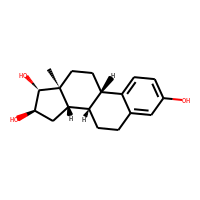
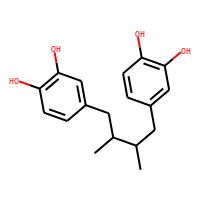
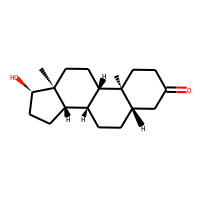
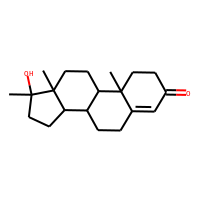
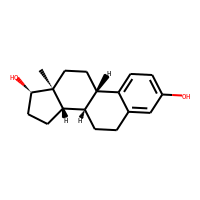
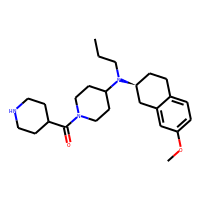
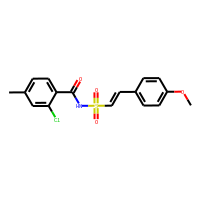
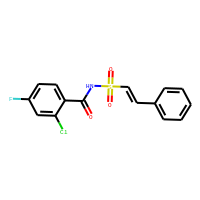
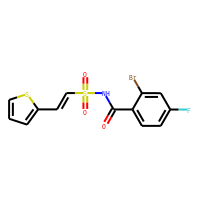
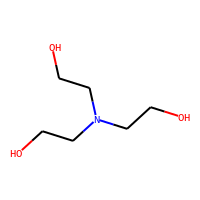

In [60]:
tmp_df

In [0]:
tmp_df.to_csv('tmp_df.csv', index=False)


In [0]:
tmp_dataset_file = "tmp_df.csv"

In [63]:
tmp_dataset = loader.featurize(tmp_dataset_file)

About to start loading CSV from tmp_df.csv
Loading shard 1 of size 8192.


/content/deepchem/deepchem/data/data_loader.py:269: FutureWarning: featurize() is deprecated and has been renamed to create_dataset(). featurize() will be removed in DeepChem 3.0
  FutureWarning)


In [0]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=dataset)]
#datasets = [dataset]
#datasets = [dataset,eval_df]
datasets = [dataset, valid_dataset, tmp_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
#train_dataset = datasets
#train_dataset, eval_dataset = datasets
train_dataset, valid_dataset, tmp_dataset = datasets

In [66]:
from sklearn.ensemble import RandomForestClassifier

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestClassifier(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir='models')
params_dict = {
    "n_estimators": [10, 50, 100, 250, 500],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)



Fitting model 1/20
hyperparameters: {'n_estimators': 10, 'max_features': 'auto'}
computed_metrics: [0.6714598956955251]
Model 1/20, Metric roc_auc_score, Validation set 0: 0.671460
	best_validation_score so far: 0.671460
Fitting model 2/20
hyperparameters: {'n_estimators': 10, 'max_features': 'sqrt'}
computed_metrics: [0.6380804680503973]
Model 2/20, Metric roc_auc_score, Validation set 1: 0.638080
	best_validation_score so far: 0.671460
Fitting model 3/20
hyperparameters: {'n_estimators': 10, 'max_features': 'log2'}
computed_metrics: [0.7242571959594086]
Model 3/20, Metric roc_auc_score, Validation set 2: 0.724257
	best_validation_score so far: 0.724257
Fitting model 4/20
hyperparameters: {'n_estimators': 10, 'max_features': None}
computed_metrics: [0.5550283035812577]
Model 4/20, Metric roc_auc_score, Validation set 3: 0.555028
	best_validation_score so far: 0.724257
Fitting model 5/20
hyperparameters: {'n_estimators': 50, 'max_features': 'auto'}
computed_metrics: [0.6983381584292399

In [0]:
best_rf.save()

In [0]:
pred = best_rf.predict(tmp_dataset)

In [0]:
pred.shape

(1671, 2)

In [0]:
pred_df = pd.DataFrame(pred)

In [0]:
pred_df.head

<bound method NDFrame.head of          0     1
0     0.00  1.00
1     0.12  0.88
2     0.02  0.98
3     0.00  1.00
4     0.00  1.00
...    ...   ...
1666  0.36  0.64
1667  0.44  0.56
1668  0.64  0.36
1669  0.56  0.44
1670  0.80  0.20

[1671 rows x 2 columns]>

In [67]:
import numpy as np
#import np.random

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=1)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=1)),
               "nb_epoch": [40] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultitaskClassifier(
    1, n_features, layer_sizes=[1000], dropouts=.25,
    batch_size=50, **model_params)
  return model

#train_dataset = dc.data.NumpyDataset(train_dataset.X, train_dataset.y, train_dataset.w, train_dataset.ids)

optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

Fitting model 1/1
hyperparameters: {'learning_rate': 2.90930523935799e-05, 'weight_decay_penalty': 2.777770617265684e-06, 'nb_epoch': 40}
computed_metrics: [0.7418240536342082]
Model 1/1, Metric roc_auc_score, Validation set 0: 0.741824
	best_validation_score so far: 0.741824
computed_metrics: [0.7380130874479477]
Best hyperparameters: (2.90930523935799e-05, 2.777770617265684e-06, 40)
train_score: 0.738013
validation_score: 0.741824


In [68]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_classifier.csv"
rf_train_stats_out = "rf_train_stats_classifier.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set AUC %f" % (rf_train_score["roc_auc_score"]))

rf_valid_csv_out = "rf_valid_classifier.csv"
rf_valid_stats_out = "rf_valid_stats_classifier.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set AUC %f" % (rf_valid_score["roc_auc_score"]))

rf_tmp_csv_out = "rf_tmp_classifier.csv"
rf_tmp_stats_out = "rf_tmp_stats_classifier.txt"
rf_tmp_evaluator = Evaluator(best_rf, tmp_dataset, transformers)
rf_tmp_score = rf_tmp_evaluator.compute_model_performance(
    [metric], rf_tmp_csv_out, rf_tmp_stats_out)
print("RF Tmp set AUC %f" % (rf_tmp_score["roc_auc_score"]))

#rf_test_csv_out = "rf_test_regressor.csv"
#rf_test_stats_out = "rf_test_stats_regressor.txt"
#rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)

#rf_test_score = rf_test_evaluator.compute_model_performance(
 #   [metric], rf_test_csv_out, rf_test_stats_out)
#print("RF Test set AUC %f" % (rf_test_score["roc_auc_score"]))

#rf_crystal_csv_out = "rf_crystal_regressor.csv"
#rf_crystal_stats_out = "rf_crystal_stats_regressor.txt"
#rf_crystal_evaluator = Evaluator(best_rf, crystal_dataset, transformers)
#rf_crystal_score = rf_crystal_evaluator.compute_model_performance(
#    [metric], rf_crystal_csv_out, rf_crystal_stats_out)
#print("RF Crystal set R^2 %f" % (rf_crystal_score["roc_auc_score"]))

computed_metrics: [1.0]
RF Train set AUC 1.000000
computed_metrics: [0.7263588004405998]
RF Valid set AUC 0.726359
computed_metrics: [0.976711143646225]
RF Tmp set AUC 0.976711


In [69]:
dnn_train_csv_out = "dnn_train_classifier.csv"
dnn_train_stats_out = "dnn_train_classifier_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set AUC %f" % (dnn_train_score["roc_auc_score"]))

dnn_valid_csv_out = "dnn_valid_classifier.csv"
dnn_valid_stats_out = "dnn_valid_classifier_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set AUC %f" % (dnn_valid_score["roc_auc_score"]))

dnn_tmp_csv_out = "dnn_tmp_classifier.csv"
dnn_tmp_stats_out = "dnn_tmp_classifier_stats.txt"
dnn_tmp_evaluator = Evaluator(best_dnn, tmp_dataset, transformers)
dnn_tmp_score = dnn_tmp_evaluator.compute_model_performance(
    [metric], dnn_tmp_csv_out, dnn_tmp_stats_out)
print("DNN Tmp set AUC %f" % (dnn_tmp_score["roc_auc_score"]))

#dnn_test_csv_out = "dnn_test_classifier.csv"
#dnn_test_stats_out = "dnn_test_classifier_stats.txt"
#dnn_test_evaluator = Evaluator(best_dnn, test_dataset, transformers)
#dnn_test_score = dnn_test_evaluator.compute_model_performance(
#    [metric], dnn_test_csv_out, dnn_test_stats_out)
#print("DNN Test set AUC %f" % (dnn_test_score["roc_auc_score"]))

#dnn_crystal_csv_out = "dnn_crystal_classifier.csv"
#dnn_crystal_stats_out = "dnn_crystal_stats_classifier.txt"
#dnn_crystal_evaluator = Evaluator(best_dnn, crystal_dataset, transformers)
#dnn_crystal_score = dnn_crystal_evaluator.compute_model_performance(
#    [metric], dnn_crystal_csv_out, dnn_crystal_stats_out)
#print("DNN Crystal set AUC %f" % (dnn_crystal_score["roc_auc_score"]))

computed_metrics: [0.7380130874479477]
DNN Train set AUC 0.738013
computed_metrics: [0.7418240536342082]
DNN Valid set AUC 0.741824
computed_metrics: [0.7404285761820784]
DNN Tmp set AUC 0.740429


In [0]:
#Now regression models
#Make directories to store the raw and featurized datasets.
#featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
featurizer = dc.feat.ConvMolFeaturizer()
loader = dc.data.CSVLoader(tasks=["bindingClass"],
    smiles_field="SMILES",
    featurizer=featurizer)

#loader = dc.data.UserCSVLoader(
#    tasks=["bindingClass"],  id_field="casrn",
#    featurizer=featurizer)
train_dataset = loader.featurize(dataset_file)
valid_dataset = loader.featurize(eval_dataset_file)
#crystal_dataset = loader.featurize(crystal_dataset_file)

About to start loading CSV from balanced_droppedcols1.csv
Loading shard 1 of size 8192.
About to start loading CSV from Eval_4.csv
Loading shard 1 of size 8192.


/content/deepchem/deepchem/data/data_loader.py:269: FutureWarning: featurize() is deprecated and has been renamed to create_dataset(). featurize() will be removed in DeepChem 3.0
  FutureWarning)


In [0]:
print("Number of compounds in train set")
print(len(train_dataset))
print("Number of compounds in validation set")
print(len(valid_dataset))

Number of compounds in train set
410
Number of compounds in validation set
3882


In [0]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [train_dataset, valid_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
train_dataset, valid_dataset = datasets

In [0]:
from sklearn.ensemble import RandomForestRegressor

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestRegressor(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.r2_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

Fitting model 1/8
hyperparameters: {'n_estimators': 10, 'max_features': 'auto'}
computed_metrics: [-0.46859212134907]
Model 1/8, Metric r2_score, Validation set 0: -0.468592
	best_validation_score so far: -0.468592
Fitting model 2/8
hyperparameters: {'n_estimators': 10, 'max_features': 'sqrt'}
computed_metrics: [-0.32119309589612577]
Model 2/8, Metric r2_score, Validation set 1: -0.321193
	best_validation_score so far: -0.321193
Fitting model 3/8
hyperparameters: {'n_estimators': 10, 'max_features': 'log2'}
computed_metrics: [-0.27003578746917145]
Model 3/8, Metric r2_score, Validation set 2: -0.270036
	best_validation_score so far: -0.270036
Fitting model 4/8
hyperparameters: {'n_estimators': 10, 'max_features': None}
computed_metrics: [-1.1921418983774932]
Model 4/8, Metric r2_score, Validation set 3: -1.192142
	best_validation_score so far: -0.270036
Fitting model 5/8
hyperparameters: {'n_estimators': 100, 'max_features': 'auto'}
computed_metrics: [-0.6124858590247964]
Model 5/8, Me

In [0]:
import numpy.random

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=2)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=2)),
               "nb_epoch": [20] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultitaskRegressor(
    1, n_features, layer_sizes=[1000], dropouts=[.25],
    batch_size=50, **model_params)
  return model

optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

Fitting model 1/4
hyperparameters: {'learning_rate': 4.728410615494824e-05, 'weight_decay_penalty': 1.6343150170604258e-06, 'nb_epoch': 20}
computed_metrics: [-1.049688501382311]
Model 1/4, Metric r2_score, Validation set 0: -1.049689
	best_validation_score so far: -1.049689
Fitting model 2/4
hyperparameters: {'learning_rate': 4.728410615494824e-05, 'weight_decay_penalty': 5.608676456022041e-05, 'nb_epoch': 20}
computed_metrics: [-1.3016012678879592]
Model 2/4, Metric r2_score, Validation set 1: -1.301601
	best_validation_score so far: -1.049689
Fitting model 3/4
hyperparameters: {'learning_rate': 2.1334255567759886e-05, 'weight_decay_penalty': 1.6343150170604258e-06, 'nb_epoch': 20}
computed_metrics: [-1.6351744887556512]
Model 3/4, Metric r2_score, Validation set 2: -1.635174
	best_validation_score so far: -1.049689
Fitting model 4/4
hyperparameters: {'learning_rate': 2.1334255567759886e-05, 'weight_decay_penalty': 5.608676456022041e-05, 'nb_epoch': 20}
computed_metrics: [-1.35358749

In [0]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_regressor.csv"
rf_train_stats_out = "rf_train_stats_regressor.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set R^2 %f" % (rf_train_score["r2_score"]))

rf_valid_csv_out = "rf_valid_regressor.csv"
rf_valid_stats_out = "rf_valid_stats_regressor.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set R^2 %f" % (rf_valid_score["r2_score"]))

computed_metrics: [0.9123034146341463]
RF Train set R^2 0.912303
computed_metrics: [-0.20693935791138673]
RF Valid set R^2 -0.206939


In [0]:
dnn_train_csv_out = "dnn_train_regressor.csv"
dnn_train_stats_out = "dnn_train_regressor_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set R^2 %f" % (dnn_train_score["r2_score"]))

dnn_valid_csv_out = "dnn_valid_regressor.csv"
dnn_valid_stats_out = "dnn_valid_regressor_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set R^2 %f" % (dnn_valid_score["r2_score"]))

computed_metrics: [0.22392938311078736]
DNN Train set R^2 0.223929
computed_metrics: [-1.049688501382311]
DNN Valid set R^2 -1.049689


In [0]:
#%matplotlib inline
#from matplotlib import pyplot as plt

#task = "bindingClass"
#rf_predicted_test = best_rf.predict(valid_dataset)
#rf_true_test = valid_dataset.y
#plt.scatter(rf_predicted_test, rf_true_test)
#plt.xlabel('Predicted bindingClass')
#plt.ylabel('Secondary Assay')
#plt.title(r'RF predicted bindingClass vs. Secondary Assay')
#plt.xlim([2, 11])
#plt.ylim([2, 11])
#plt.plot([2, 11], [2, 11], color='k')
#plt.show()

In [0]:
#task = "bindingClass"
#dnn_predicted_test = best_dnn.predict(valid_dataset, transformers)
#dnn_true_test = valid_dataset.y
#plt.scatter(dnn_predicted_test, dnn_true_test)
#plt.xlabel('Predicted bindingClass')
#plt.ylabel('Secondary Assay')
#plt.title(r'DNN predicted bindingClass vs. Secondary Assay')
#plt.xlim([2, 11])
#plt.ylim([2, 11])
#plt.plot([2, 11], [2, 11], color='k')
#plt.show()